# Permasalahan Klasifikasi

Pertama-tama, download repository dari mitdeeplearning, install dependensi dan import paket yang dibutuhkan dalam latihan ini

In [1]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Nyalakan fitur ini jika menggunakan GPU atau ragu apakah tersedia GPU atau tidak
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1 MB 16.0 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=21768b7413a68a5205c281cc68679098760c88950fd79e5c08fd86f7ff53ccc2
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


## Load Datasets CIFAR10

Eksplorasi ini akan menggunakan dataset CIFAR10 dengan spesifikasi :<br>
Jumlah training dataset sebanyak 50.000<br>
Jumlah test dataset sebanyak 10.000<br>
Ukuran gambar berwarna 32x32 pixel

In [2]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = (train_images/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (test_images/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

#tampilkan dimensi dataset
print('train_images.shape', train_images.shape)
print('train_labels.shape', train_labels.shape)
print('test_images.shape', test_images.shape)
print('test_labels.shape', test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
train_images.shape (50000, 32, 32, 3)
train_labels.shape (50000, 1)
test_images.shape (10000, 32, 32, 3)
test_labels.shape (10000, 1)


Dataset pelatihan dan training adalah gambar berwarna dengan ukuran 32x32<br><br>
Berikut daftar kode label dan Deskripsinya
<table align="left" width="50%">
<thead>
<tr>
<th align="center" width="25%">Label</th>
<th>Deskripsi</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">0</td>
<td>airplane</td>
</tr>
<tr>
<td align="center">1</td>
<td>automobile</td>
</tr>
<tr>
<td align="center">2</td>
<td>bird</td>
</tr>
<tr>
<td align="center">3</td>
<td>cat</td>
</tr>
<tr>
<td align="center">4</td>
<td>deer</td>
</tr>
<tr>
<td align="center">5</td>
<td>dog</td>
</tr>
<tr>
<td align="center">6</td>
<td>frog</td>
</tr>
<tr>
<td align="center">7</td>
<td>horse</td>
</tr>
<tr>
<td align="center">8</td>
<td>ship</td>
</tr>
<tr>
<td align="center">9</td>
<td>truck</td>
</tr>
</tbody>
</table>


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


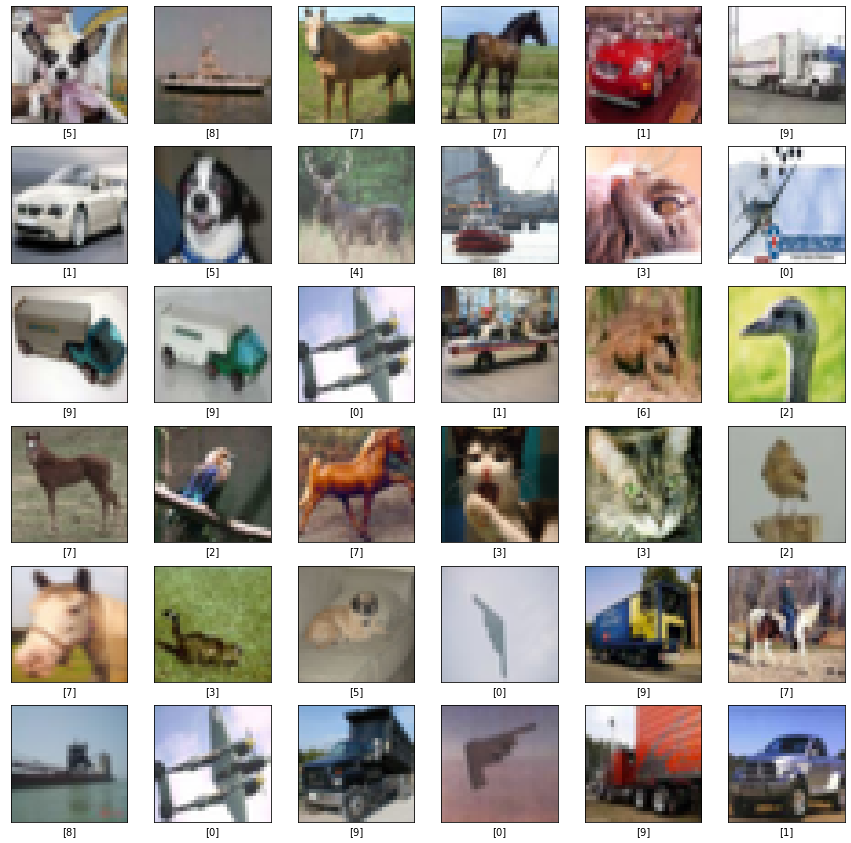

In [3]:
# Mengambil beberapa sampel training dataset untuk ditampilkan
plt.figure(figsize=(15,15))
random_inds = np.random.choice(50000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## Membangun Model CNN

In [10]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Mendefinisikan convolutional layer pertama
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
        # Mendefinisikan max pooling layer pertama
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Mendefinisikan convolutional layer pertama kedua
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.nn.relu),
        # Mendefinisikan max pooling layer kedua
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Mendefinisikan convolutional layer pertama ketiga
        #tf.keras.layers.Conv2D(filters=150, kernel_size=(3,3), activation=tf.nn.relu),
        # Mendefinisikan max pooling layer ketiga
        #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        

        # Mengubah dari convolution layer ke dense layer
        tf.keras.layers.Flatten(),
        # Mendefinisikan dense layer pertama
        #tf.keras.layers.Dense(500, activation=tf.nn.relu),
        # Mendefinisikan dense layer kedua
        #tf.keras.layers.Dense(150, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),

        # Mendefinisikan dense layer untuk output klasifikasi
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
tf.random.set_seed(0)
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 512)              

## Melakukan Training dan tes Model CNN

In [11]:
# Mendefinisikan compile operation dengan konfigurasi optimizer dan learning rate 
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Mendefinisikan ukuran batch dan jumlah epoch yang akan digunakan dalam training
BATCH_SIZE = 64
EPOCHS = 5

# Melakukan training dengan konfigurasi model, batch_size dan jumlah epochs yang telah ditentukan sebelumnya
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/5
782/782 [==============================] - 151s 192ms/step - loss: 2.3003 - accuracy: 0.1421
Epoch 2/5
782/782 [==============================] - 150s 192ms/step - loss: 2.2929 - accuracy: 0.1916
Epoch 3/5
509/782 [==================>...........] - ETA: 52s - loss: 2.2850 - accuracy: 0.1938

In [7]:
# Melakukan tes pada dataset testing
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 28ms/step - loss: 0.8673 - accuracy: 0.7145
Test accuracy: 0.7145000100135803


In [36]:
predictions = cnn_model.predict(test_images)

In [37]:
predictions[0]

array([2.8827848e-04, 4.4047046e-03, 2.3586478e-02, 8.7869346e-01,
       7.8708725e-03, 4.8305195e-02, 2.9560139e-02, 2.9290088e-03,
       3.8546519e-03, 5.0722761e-04], dtype=float32)

In [38]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0]) 

print(prediction)

3


Label of this digit is: [3]


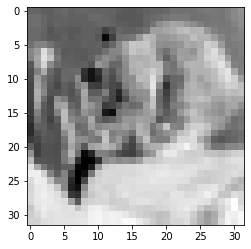

In [39]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

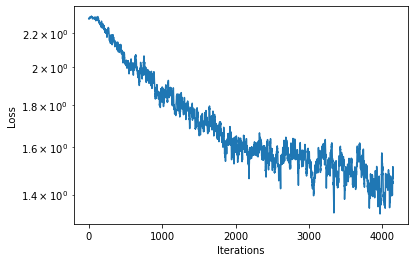

100%|██████████| 4167/4167 [03:48<00:00, 18.20it/s]


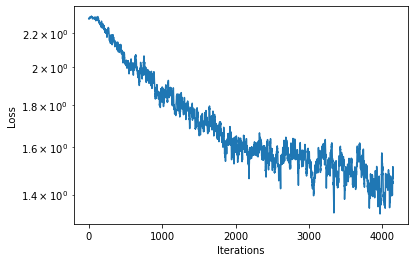

In [26]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)
    # logits = # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    # loss_value = tf.keras.backend.sparse_categorical_crossentropy() # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  # grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))